In [127]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import linregress

electric_cars_to_load = Path("Resources/Electric_Vehicle_Population_Data.csv")
#population_to_load= Path("Resources/Electric_Vehicle_Population_Size_History_By_County.csv")

electric_car_data = pd.read_csv(electric_cars_to_load)
#population_data=pd.read_csv(population_to_load)

electric_car_data.head()
#population_data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [129]:
total_cars = len(electric_car_data)
total_cars

191407

In [130]:
ev_city = electric_car_data["City"].value_counts()
ev_city.head(15)

City
Seattle       31436
Bellevue       9582
Redmond        6883
Vancouver      6744
Bothell        6278
Kirkland       5709
Sammamish      5595
Renton         5584
Olympia        4600
Tacoma         4011
Tukwila        3182
Bellingham     3171
Kent           3050
Issaquah       2958
Spokane        2950
Name: count, dtype: int64

In [131]:
unique_cars=electric_car_data["Make"].nunique()
unique_cars

42

In [132]:
per_make_counts = electric_car_data["Make"].value_counts()
 
per_make_counts.head(15)

Make
TESLA            84670
CHEVROLET        14321
NISSAN           14239
FORD             10048
KIA               8671
BMW               7993
TOYOTA            7181
VOLKSWAGEN        5408
JEEP              4996
HYUNDAI           4977
RIVIAN            4751
VOLVO             4469
AUDI              3890
CHRYSLER          3393
MERCEDES-BENZ     1784
Name: count, dtype: int64

In [133]:
model_year=electric_car_data["Model Year"].value_counts()
model_year.head(10)

Model Year
2023    60084
2022    28116
2021    19531
2024    16963
2018    14340
2020    12149
2019    10933
2017     8650
2016     5528
2015     4818
Name: count, dtype: int64

Model Year
2014     3533
2015     4818
2016     5528
2017     8650
2018    14340
2019    10933
2020    12149
2021    19531
2022    28116
2023    60084
2024    16963
Name: count, dtype: int64


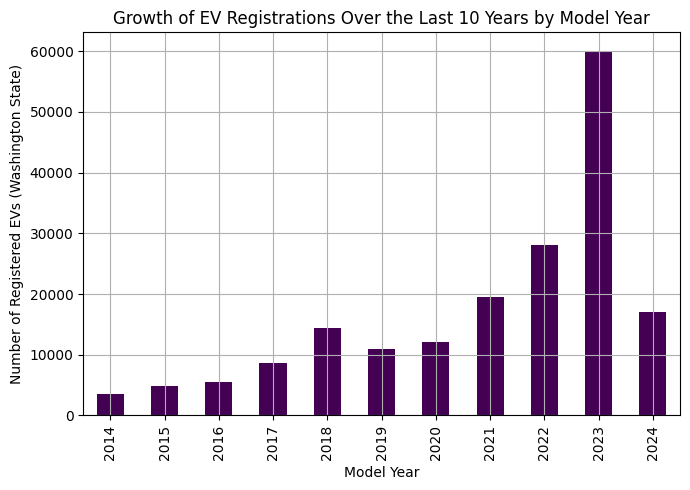

In [139]:

# Determine the current year
current_year = pd.to_datetime('now').year

# Extract data for the last 10 years
last_10_years = range(current_year - 10, current_year + 1)
recent_ev_data = electric_car_data[electric_car_data['Model Year'].isin(last_10_years)]

# Count the number of cars registered each year
model_year_counts = recent_ev_data['Model Year'].value_counts().sort_index()

# Display the counts
print(model_year_counts)

# Plot the growth of EV registrations over the last 10 years
model_year_counts.plot(kind='bar', stacked=True, figsize=(7, 5),colormap='viridis')
plt.title('Growth of EV Registrations Over the Last 10 Years by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Registered EVs (Washington State)')
plt.grid(True)
plt.tight_layout()
plt.savefig("output_data/Fig2.png")
# Save the plot as an image file
#plt.savefig('ev_growth_last_10_years.png')

# Show the plot
plt.show()


In [140]:

data = {
    'Year': last_10_years,
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': num_eligible_cars,
    'Registered Cars': total_cars
}
df = pd.DataFrame(data)

# Add a constant to the independent variable (tax credits)
X = sm.add_constant(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Dependent variable (registered cars)
y = df['Registered Cars']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Registered Cars   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 14 Jul 2024   Prob (F-statistic):                nan
Time:                        10:41:26   Log-Likelihood:                    inf
No. Observations:                  11   AIC:                              -inf
Df Residuals:                      10   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


In [134]:
#What is the amount of cars that are eligible from a Tax Credit vs Not Eligible

eligible_ev_cars = electric_car_data[electric_car_data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Clean Alternative Fuel Vehicle Eligible"]

# Count the number of eligible cars
num_eligible_cars = len(eligible_ev_cars)

# Count the total number of cars
total_cars = len(electric_car_data)

# Calculate the number of cars that are not eligible
num_not_eligible_cars = total_cars - num_eligible_cars

# Print the summary
print(f"Number of cars eligible for the tax credit: {num_eligible_cars}")
print(f"Number of cars not eligible for the tax credit: {num_not_eligible_cars}")

Number of cars eligible for the tax credit: 68785
Number of cars not eligible for the tax credit: 122622


In [128]:
group_models=electric_car_data.groupby('Model Year')['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(group_models)

Model Year  Clean Alternative Fuel Vehicle (CAFV) Eligibility           
1997        Clean Alternative Fuel Vehicle Eligible                             1
1998        Clean Alternative Fuel Vehicle Eligible                             1
1999        Clean Alternative Fuel Vehicle Eligible                             5
2000        Clean Alternative Fuel Vehicle Eligible                             7
2002        Clean Alternative Fuel Vehicle Eligible                             2
2003        Clean Alternative Fuel Vehicle Eligible                             1
2008        Clean Alternative Fuel Vehicle Eligible                            21
2010        Clean Alternative Fuel Vehicle Eligible                            24
2011        Clean Alternative Fuel Vehicle Eligible                           736
2012        Clean Alternative Fuel Vehicle Eligible                          1217
            Not eligible due to low battery range                             378
2013        Clean Alterna

In [135]:
percentage_eligible = int((num_eligible_cars / total_cars) * 100)
percentage_not_eligible =int((num_not_eligible_cars / total_cars) * 100)
print(percentage_eligible)
print(percentage_not_eligible)

35
64


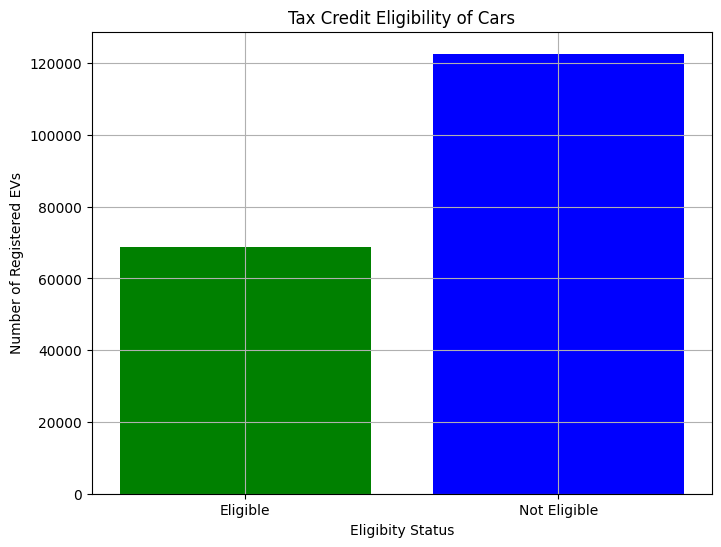

In [136]:
categories = ['Eligible', 'Not Eligible'] 
values = [68785, 122622] 
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'blue'])

plt.savefig("output_data/Fig1.png")
plt.grid(True)
plt.xlabel('Eligibity Status') 
plt.ylabel('Number of Registered EVs') 
plt.title('Tax Credit Eligibility of Cars') 
plt.show()

# Analysis of Findings  
Eligibility for CAFVs can vary depending on the context, such as government incentives, tax credits, regulatory definitions, or programs aimed at 
promoting environmentally friendly transportation.


In [138]:
#Find the Total Legislative Districts 
legislative_districts = electric_car_data["Legislative District"].nunique()
legislative_districts


49

Stats Summary: In summary, the output indicates that Clean Alternative Fuel Vehicle (CAFV) Eligibility has a statistically 
significant and positive effect on Registered Cars according to your regression analysis. The coefficient 2.7827 
suggests that, on average, an increase in Clean Alternative Fuel Vehicle (CAFV) Eligibility is associated with an 
increase in Registered Cars by approximately 2.7827 units, with high confidence based on the provided statistical tests.

In [141]:
model_size=electric_car_data.groupby('Model Year').size()
model_size

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       21
2010       24
2011      736
2012     1595
2013     4363
2014     3533
2015     4818
2016     5528
2017     8650
2018    14340
2019    10933
2020    12149
2021    19531
2022    28116
2023    60084
2024    16963
2025        6
dtype: int64

In [142]:
eligibility_df=electric_car_data[electric_car_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']==\
                                                    'Clean Alternative Fuel Vehicle Eligible']


eligible_by_year=eligibility_df.groupby('Model Year').size()

eligible_by_year



Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       21
2010       24
2011      736
2012     1217
2013     3551
2014     2759
2015     4151
2016     4176
2017     6379
2018    12013
2019     9349
2020    10669
2021     2292
2022     2420
2023     5304
2024     3706
2025        1
dtype: int64

In [143]:
regression_dataframe=pd.DataFrame({
    'Total Number of Vehicles': model_size,
    'Eligible Vehicles': eligible_by_year}).reset_index()

print(regression_dataframe)

    Model Year  Total Number of Vehicles  Eligible Vehicles
0         1997                         1                  1
1         1998                         1                  1
2         1999                         5                  5
3         2000                         7                  7
4         2002                         2                  2
5         2003                         1                  1
6         2008                        21                 21
7         2010                        24                 24
8         2011                       736                736
9         2012                      1595               1217
10        2013                      4363               3551
11        2014                      3533               2759
12        2015                      4818               4151
13        2016                      5528               4176
14        2017                      8650               6379
15        2018                     14340

Slope (Coefficient): 0.109901083057517
Intercept: 2076.050582400428


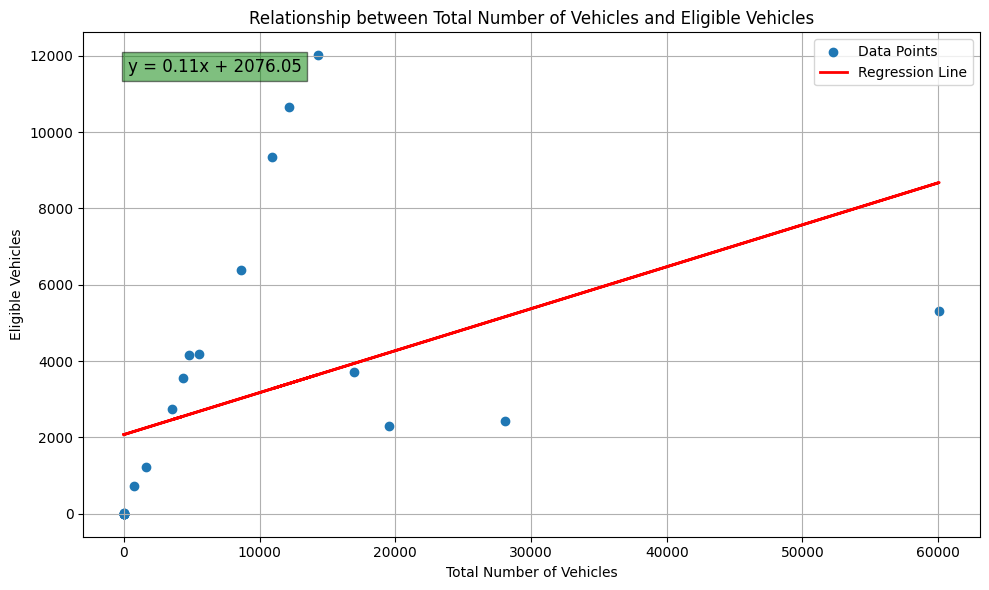

In [157]:
regression_model=LinearRegression()
regression_model.fit(regression_dataframe[['Total Number of Vehicles']],regression_dataframe['Eligible Vehicles'])
slope=regression_model.coef_[0]
intercept = regression_model.intercept_


print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

plt.figure(figsize=(10, 6))
plt.scatter(regression_dataframe['Total Number of Vehicles'],regression_dataframe['Eligible Vehicles'] , label='Data Points')

# Plotting the regression line
plt.plot(regression_dataframe[['Total Number of Vehicles']], regression_model.predict(regression_dataframe[['Total Number of Vehicles']]), color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.title('Relationship between Total Number of Vehicles and Eligible Vehicles')
plt.xlabel('Total Number of Vehicles')
plt.ylabel('Eligible Vehicles')

equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='green', alpha=0.5))

plt.legend()
plt.savefig("output_data/Fig4.png")
# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
There is a positive relationship between the total number of vehicles and the number of eligible vehicles, 
suggesting that as the total number of vehicles increases, the number of eligible vehicles also tends to increase.

Regression Equation
Putting these together, the linear regression equation can be expressed as:

y=slope×x+intercept
Eligible Vehicles=0.109901083057517×Total Number of Vehicles+2076.050582400428



In [145]:


# Prepare the data
X = regression_dataframe[['Total Number of Vehicles']]
y = regression_dataframe['Eligible Vehicles']

# Add a constant to the predictor variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Eligible Vehicles   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     4.333
Date:                Sun, 14 Jul 2024   Prob (F-statistic):             0.0498
Time:                        10:41:49   Log-Likelihood:                -218.52
No. Observations:                  23   AIC:                             441.0
Df Residuals:                      21   BIC:                             443.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The p-value for the intercept (0.021) is less than 0.05, indicating that the intercept is statistically significant.

# Conclusion
The results indicate a weak but potentially significant positive relationship between the "Total Number of Vehicles" and 
"Eligible Vehicles". The p-value for the slope is right on the threshold of significance (0.050), it suggests that
there might be a small but positive effect of the total number of vehicles on the number of eligible vehicles. 


In [148]:


# Filter the data for Nissan vehicles
nissan_data = electric_car_data[electric_car_data["Make"] == "NISSAN"]

# Count the occurrences of each Nissan model
nissan_model_counts = nissan_data["Model"].value_counts()

# Check if nissan_model_counts is not empty before finding the most popular model
if not nissan_model_counts.empty:
    most_popular_nissan_model = nissan_model_counts.idxmax()
    most_popular_nissan_count = nissan_model_counts.max()
    print(f"The most popular Nissan model is {most_popular_nissan_model} with {most_popular_nissan_count} registrations.")
else:
    print("No Nissan models found in the dataset.")



The most popular Nissan model is LEAF with 13439 registrations.


In [149]:

make_counts = electric_car_data["Make"].value_counts()

# Identify the top 4 car makes
top_4_makes = make_counts.head(4)

print("Top 4 car makes in EV registrations:")
print(top_4_makes)

# For each of the top 4 makes, find the most popular model
for make in top_4_makes.index:
    make_data = electric_car_data[electric_car_data["Make"] == make]
    model_counts = make_data["Model"].value_counts()
    
    if not model_counts.empty:
        most_popular_model = model_counts.idxmax()
        most_popular_count = model_counts.max()
        print(f"The most popular model for {make} is {most_popular_model} with {most_popular_count} registrations.")
    else:
        print(f"No models found for make {make} in the dataset.")


Top 4 car makes in EV registrations:
Make
TESLA        84670
CHEVROLET    14321
NISSAN       14239
FORD         10048
Name: count, dtype: int64
The most popular model for TESLA is MODEL Y with 39521 registrations.
The most popular model for CHEVROLET is BOLT EV with 6444 registrations.
The most popular model for NISSAN is LEAF with 13439 registrations.
The most popular model for FORD is MUSTANG MACH-E with 3758 registrations.


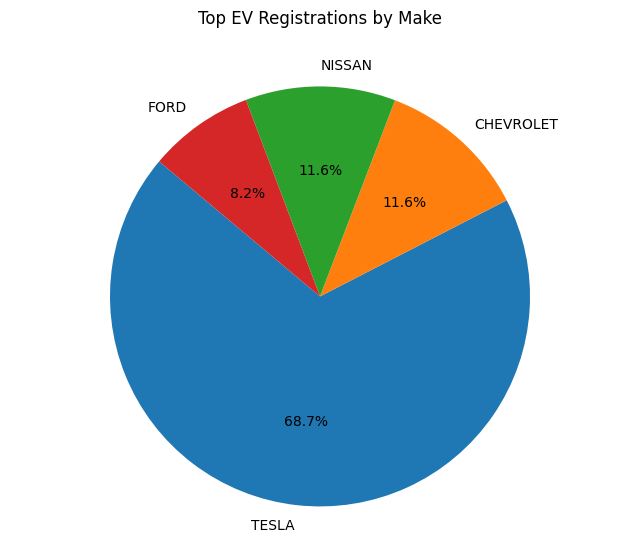

In [150]:

labels = ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD']
sizes = [84670, 14321, 14239, 10048]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors for each slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.savefig("output_data/Fig3.png")
# Add title
plt.title('Top EV Registrations by Make', pad=30)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [151]:
top_4_makes = ['TESLA', 'NISSAN', 'FORD', 'CHEVROLET']

# Filter electric_car_data for the top 4 makes
filtered_data = electric_car_data[electric_car_data['Make'].isin(top_4_makes)]

# Filter for models that meet the eligibility requirement
eligible_models = filtered_data[filtered_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.contains('Clean Alternative Fuel Vehicle Eligible', case=False)]

# Display or print eligible models
print("Models meeting CAFV eligibility requirement for each make:")
for make in top_4_makes:
    make_models = eligible_models[eligible_models['Make'] == make]['Model'].unique()
    print(f"{make}: {', '.join(make_models)}")


Models meeting CAFV eligibility requirement for each make:
TESLA: MODEL S, MODEL 3, MODEL Y, MODEL X, ROADSTER
NISSAN: LEAF
FORD: ESCAPE, FOCUS, RANGER
CHEVROLET: VOLT, BOLT EV, SPARK, S-10 PICKUP


Counts of models meeting CAFV eligibility requirement for each make:
         Make        Model  Count
0   CHEVROLET      BOLT EV   4533
1   CHEVROLET  S-10 PICKUP      1
2   CHEVROLET        SPARK    247
3   CHEVROLET         VOLT   4801
4        FORD        C-MAX   1504
5        FORD       ESCAPE    423
6        FORD        FOCUS    229
7        FORD       FUSION   1781
8        FORD       RANGER     13
9      NISSAN         LEAF  10721
10      TESLA      MODEL 3  13862
11      TESLA      MODEL S   6021
12      TESLA      MODEL X   3363
13      TESLA      MODEL Y   2397
14      TESLA     ROADSTER     48


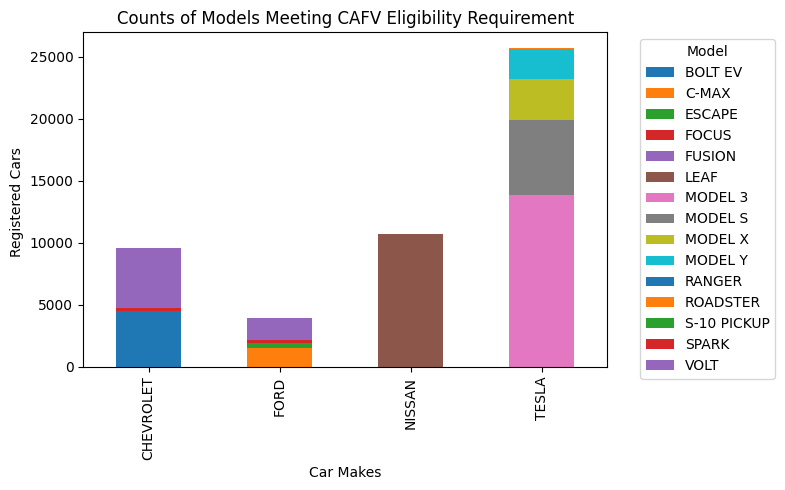

In [160]:
top_4_makes = ['TESLA', 'NISSAN', 'FORD', 'CHEVROLET']

# Filter electric_car_data for the top 4 makes
filtered_data = electric_car_data[electric_car_data['Make'].isin(top_4_makes)]

# Filter for models that meet the eligibility requirement
eligible_models = filtered_data[filtered_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.contains('Eligible', case=False)]

# Count the number of eligible models for each make and model
model_counts = eligible_models.groupby(['Make', 'Model']).size().reset_index(name='Count')

# print the counts
print("Counts of models meeting CAFV eligibility requirement for each make:")
print(model_counts)

# Pivot the data to prepare for stacked bar chart
pivot_data = model_counts.pivot(index='Make', columns='Model', values='Count').fillna(0)

# Plotting stacked bar chart
fig, ax = plt.subplots(figsize=(8, 5))

pivot_data.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Car Makes')
ax.set_ylabel('Registered Cars ')
ax.set_title('Counts of Models Meeting CAFV Eligibility Requirement')
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

pdf_filename = ('output_data/top_4_models.pdf')
with PdfPages(pdf_filename) as pdf:
    pdf.savefig(fig, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

/var/folders/yx/mscwdl4d42xd49b1zt9vkbph0000gn/T/ipykernel_812/2143297219.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(electric_car_data['Number of Models'], electric_car_data['Total Number of Vehicles'])


Pearson correlation coefficient: nan, p-value: nan
Regression results:
Slope (Coefficient): nan
Intercept: nan
R-squared: nan
P-value: nan


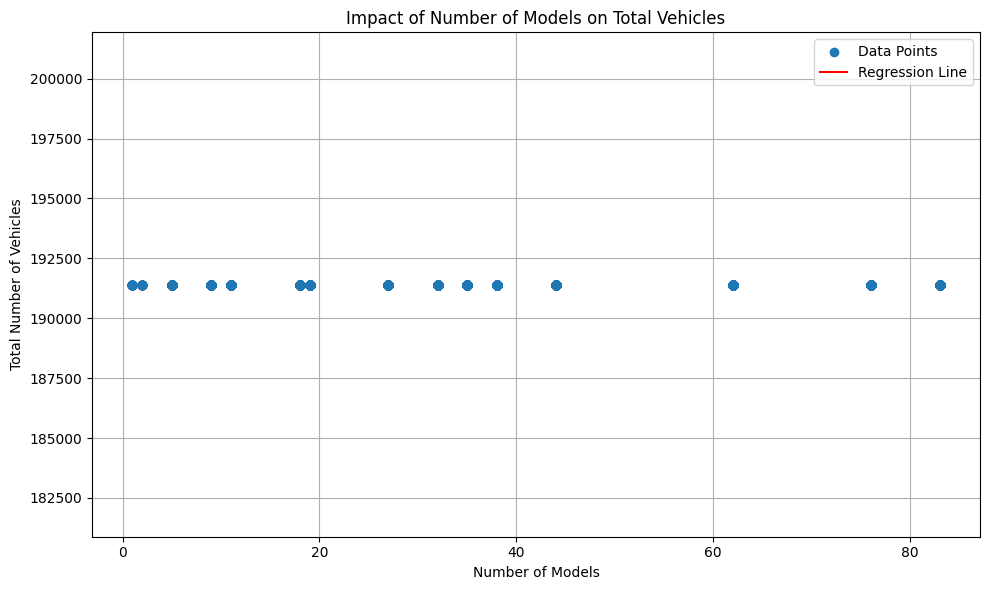

In [153]:

#Create a new column, to define our Total Registered Vehicles 
electric_car_data['Total Number of Vehicles']=len(electric_car_data)

# Calculate growth rate for Total Number of Vehicle
electric_car_data['Vehicle Growth Rate'] = electric_car_data['Total Number of Vehicles'].pct_change() * 100
# Calculate Number of Models per Model Year
electric_car_data['Number of Models'] = electric_car_data.groupby('Model Year')['Model'].transform('nunique')

# Correlation analysis
corr_coefficient, p_value = pearsonr(electric_car_data['Number of Models'], electric_car_data['Total Number of Vehicles'])
print(f"Pearson correlation coefficient: {corr_coefficient:.2f}, p-value: {p_value:.2f}")

# Regression analysis
slope, intercept, r_value, p_value, std_err = linregress(electric_car_data['Number of Models'], electric_car_data['Vehicle Growth Rate'])

print(f"Regression results:")
print(f"Slope (Coefficient): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(electric_car_data['Number of Models'], electric_car_data['Total Number of Vehicles'], label='Data Points')
plt.plot(electric_car_data['Number of Models'], intercept + slope * electric_car_data['Number of Models'], color='red', label='Regression Line')
plt.xlabel('Number of Models')
plt.ylabel('Total Number of Vehicles')
plt.title('Impact of Number of Models on Total Vehicles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





In [154]:

electric_car_data['Total Number of Vehicles'] = electric_car_data.groupby('Model Year')['Model'].transform('size')

# Calculate number of models per year
electric_car_data['Number of Models'] = electric_car_data.groupby('Model Year')['Model'].transform('nunique')



# Correlation analysis
corr_coefficient, p_value = pearsonr(merged_data['Number of Models'], merged_data['Total Number of Vehicles'])
print(f"Pearson correlation coefficient: {corr_coefficient:.2f}, p-value: {p_value:.2f}")

# Regression analysis
try:
    slope, intercept, r_value, p_value, std_err = linregress(merged_data['Number of Models'], merged_data['Total Number of Vehicles'])
    print(f"Regression results:")
    print(f"Slope (Coefficient): {slope:.2f}")
    print(f"Intercept: {intercept:.2f}")
    print(f"R-squared: {r_value**2:.2f}")
    print(f"P-value: {p_value:.2f}")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_data['Number of Models'], merged_data['Total Number of Vehicles'], label='Data Points')
    plt.plot(merged_data['Number of Models'], intercept + slope * merged_data['Number of Models'], color='red', label='Regression Line')
    plt.xlabel('Number of Models')
    plt.ylabel('Total Number of Vehicles')
    plt.title('Impact of Number of Models on Total Vehicles')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Regression analysis error: {e}")


Pearson correlation coefficient: nan, p-value: nan
Regression analysis error: Cannot calculate a linear regression if all x values are identical


/var/folders/yx/mscwdl4d42xd49b1zt9vkbph0000gn/T/ipykernel_812/510954669.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(merged_data['Number of Models'], merged_data['Total Number of Vehicles'])


    Model Year  Total Number of Vehicles  Number of Models
0         1997                         1                 1
1         1998                         1                 1
2         1999                         5                 1
3         2000                         7                 1
4         2002                         2                 1
5         2003                         1                 1
6         2008                        21                 1
7         2010                        24                 2
8         2011                       736                 5
9         2012                      1595                 9
10        2013                      4363                11
11        2014                      3533                18
12        2015                      4818                19
13        2016                      5528                27
14        2017                      8650                32
15        2018                     14340                

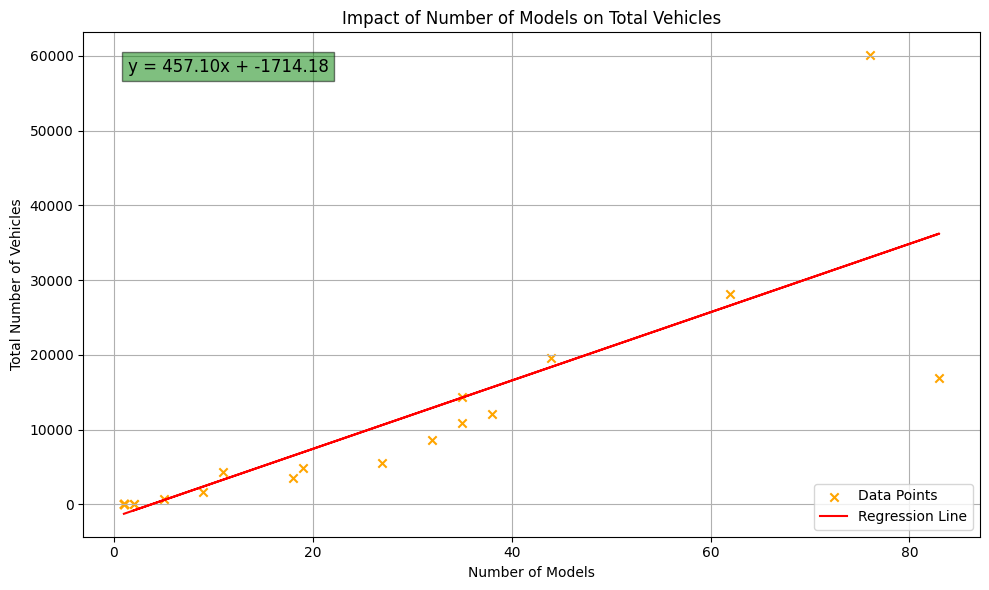

In [165]:


# Calculate the total number of vehicles per year
vehicles_by_year = electric_car_data.groupby('Model Year').size().reset_index(name='Total Number of Vehicles')

# Calculate the number of unique models per year
models_by_year = electric_car_data.groupby('Model Year')['Model'].nunique().reset_index(name='Number of Models')

# Merge both datasets on Model Year
merged_data = pd.merge(vehicles_by_year, models_by_year, on='Model Year')

# Print the merged data to inspect
print(merged_data)

# Correlation analysis
corr_coefficient, p_value = pearsonr(merged_data['Number of Models'], merged_data['Total Number of Vehicles'])
print(f"Pearson correlation coefficient: {corr_coefficient:.2f}, p-value: {p_value:.2f}")

# Regression analysis
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Number of Models'], merged_data['Total Number of Vehicles'])
print(f"Regression results:")
print(f"Slope (Coefficient): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Number of Models'], merged_data['Total Number of Vehicles'], marker="x", color="orange", label='Data Points')
plt.plot(merged_data['Number of Models'], intercept + slope * merged_data['Number of Models'], color='red', label='Regression Line')
plt.xlabel('Number of Models')
plt.ylabel('Total Number of Vehicles')
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='green', alpha=0.5))
plt.title('Impact of Number of Models on Total Vehicles')
plt.legend()
plt.savefig("output_data/Fig5.png")
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusion
The regression analysis shows that for each additional model, there are on average 457.10 more registered vehicles.
The R-squared value of 0.71 suggests that about 71% of the variability in the total number of vehicles can be explained 
by the number of models available.

The plot shows the relationship between the number of models and the total number of vehicles, with the red line representing
the regression line. This visual representation further supports the strong positive relationship between these variables. ​​






